In [1]:
import torch

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('idinn_dev.log'),
        logging.StreamHandler()
    ]
)

2025-03-05 16:19:19,619 - idinn.single_controller.base_stock - INFO - Initialized BaseStockController
2025-03-05 16:19:19,622 - idinn.single_controller.base_stock - INFO - Starting base stock policy calculation at 2025-03-05 16:19:19.622423
2025-03-05 16:19:19,622 - idinn.single_controller.base_stock - INFO - Sourcing model parameters: batch_size=32, lead_time=0, init_inventory=10, demand_generator=UniformDemand
2025-03-05 16:19:19,623 - idinn.single_controller.base_stock - INFO - Training parameters: num_samples=100000
2025-03-05 16:19:19,630 - idinn.single_controller.base_stock - INFO - Policy calculation completed at 2025-03-05 16:19:19.630238
2025-03-05 16:19:19,630 - idinn.single_controller.base_stock - INFO - Total calculation duration: 0:00:00.007815
2025-03-05 16:19:19,631 - idinn.single_controller.base_stock - INFO - Optimal base stock level (z*): 4
2025-03-05 16:19:19,746 - idinn.single_controller.base_stock - INFO - Final best cost: 7.5614


0

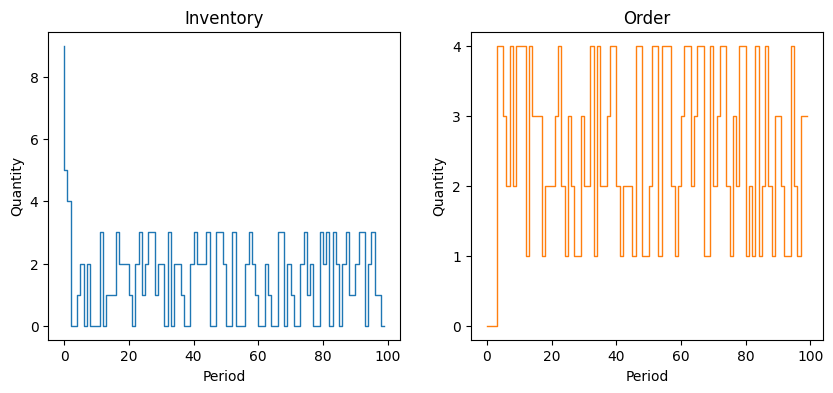

In [17]:
from idinn.sourcing_model import SingleSourcingModel
from idinn.single_controller import BaseStockController
from idinn.demand import UniformDemand

single_sourcing_model = SingleSourcingModel(
    lead_time=0,
    holding_cost=5,
    shortage_cost=495,
    batch_size=32,
    init_inventory=10,
    demand_generator=UniformDemand(low=1, high=4),
)
controller = BaseStockController()
controller.fit(
    sourcing_model=single_sourcing_model,
    seed=42,
)
fig, ax = controller.plot(sourcing_model=single_sourcing_model, sourcing_periods=100)
controller.predict(current_inventory=10, past_orders=[1, 5])

In [ ]:
from idinn.sourcing_model import SingleSourcingModel
from idinn.single_controller import BaseStockController
from idinn.demand import UniformDemand

single_sourcing_model = SingleSourcingModel(
    lead_time=2,
    holding_cost=5,
    shortage_cost=495,
    init_inventory=10,
    demand_generator=UniformDemand(low=0, high=4),
)
controller_base = BaseStockController()
# z_star should be 11
controller_base.fit(single_sourcing_model, epochs=1000, seed=42)
print(f"z_star: {controller_base.z_star}")
# Avg. cost near 29
avg_cost = controller_base.get_average_cost(single_sourcing_model, sourcing_periods=1000, seed=42)
print(f"Avg. cost: {avg_cost}")
# Simulate
past_inventories, past_orders = controller_base.simulate(single_sourcing_model, sourcing_periods=100)
# Plot
controller_base.plot(single_sourcing_model, sourcing_periods=100)
controller_base.predict(current_inventory=10, output_tensor=True)

2025-03-05 16:11:46,049 - idinn.single_controller.base_stock - INFO - Initialized BaseStockController


2025-03-05 16:11:46,051 - idinn.single_controller.base_stock - INFO - Starting base stock policy calculation at 2025-03-05 16:11:46.051040
2025-03-05 16:11:46,051 - idinn.single_controller.base_stock - INFO - Sourcing model parameters: batch_size=32, lead_time=0, init_inventory=10, demand_generator=UniformDemand
2025-03-05 16:11:46,052 - idinn.single_controller.base_stock - INFO - Training parameters: num_samples=100000
2025-03-05 16:11:46,056 - idinn.single_controller.base_stock - INFO - Policy calculation completed at 2025-03-05 16:11:46.056242
2025-03-05 16:11:46,056 - idinn.single_controller.base_stock - INFO - Total calculation duration: 0:00:00.005202
2025-03-05 16:11:46,057 - idinn.single_controller.base_stock - INFO - Optimal base stock level (z*): 4
2025-03-05 16:11:46,206 - idinn.single_controller.base_stock - INFO - Final best cost: 10.0845


z_star: 4
Avg. cost: 10.01171875


0

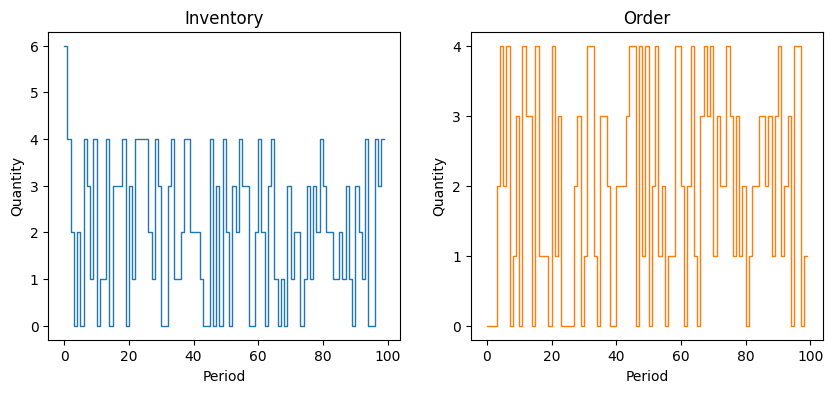

In [12]:
single_sourcing_model = SingleSourcingModel(
    lead_time=0,
    holding_cost=5,
    shortage_cost=495,
    batch_size=32,
    init_inventory=10,
    demand_generator=UniformDemand(low=0, high=4),
 )
controller_base = BaseStockController()
# z_star should be 4
controller_base.fit(single_sourcing_model, seed=42)
print(f"z_star: {controller_base.z_star}")
# Avg. cost near 10
avg_cost = controller_base.get_average_cost(
    single_sourcing_model, sourcing_periods=1000, seed=42
)
print(f"Avg. cost: {avg_cost}")
# Simulate
past_inventories, past_orders = controller_base.simulate(single_sourcing_model, sourcing_periods=100)
# Plot
controller_base.plot(single_sourcing_model, sourcing_periods=100)

controller_base.predict(current_inventory=10)

2025-03-05 16:20:01,307 - idinn.single_controller.single_neural - INFO - Initialized SingleSourcingNeuralController with hidden_layers=[2]
2025-03-05 16:20:01,309 - idinn.single_controller.single_neural - INFO - Starting single sourcing neural network training at 2025-03-05 16:20:01.309311
2025-03-05 16:20:01,309 - idinn.single_controller.single_neural - INFO - Sourcing model parameters: batch_size=32, lead_time=0, init_inventory=10, demand_generator=UniformDemand
2025-03-05 16:20:01,310 - idinn.single_controller.single_neural - INFO - Training parameters: epochs=2000, sourcing_periods=50, validation_periods=1000, learning_rate=0.003
2025-03-05 16:20:01,684 - idinn.single_controller.single_neural - INFO - Epoch 0/2000 - Training cost: 4767.4751
2025-03-05 16:20:01,684 - idinn.single_controller.single_neural - INFO - Epoch 0/2000 - Validation cost: 5704.1733
2025-03-05 16:20:03,462 - idinn.single_controller.single_neural - INFO - Epoch 50/2000 - Training cost: 1495.4375
2025-03-05 16:20

Avg. cost: 7.457656383514404


4

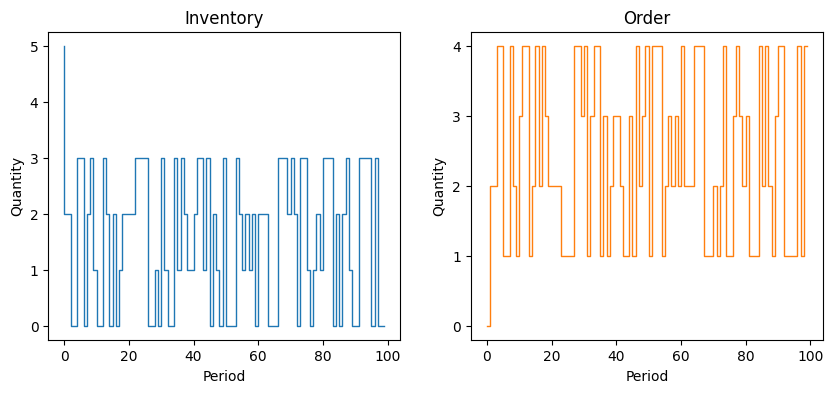

In [19]:
from idinn.sourcing_model import SingleSourcingModel
from idinn.single_controller import SingleSourcingNeuralController
from idinn.demand import UniformDemand
from torch.utils.tensorboard import SummaryWriter

single_sourcing_model = SingleSourcingModel(
    lead_time=0,
    holding_cost=5,
    shortage_cost=495,
    batch_size=32,
    init_inventory=10,
    demand_generator=UniformDemand(low=1, high=4),
)

controller_neural = SingleSourcingNeuralController()
controller_neural.fit(
    sourcing_model=single_sourcing_model,
    sourcing_periods=50,
    validation_sourcing_periods=1000,
    epochs=2000,
    tensorboard_writer=SummaryWriter(comment="_single_1"),
    seed=1,
)
# Avg. cost near 7.57
avg_cost = controller_neural.get_average_cost(single_sourcing_model, sourcing_periods=1000)
print(f"Avg. cost: {avg_cost}")
# Simulate
past_inventories, past_orders = controller_neural.simulate(single_sourcing_model, sourcing_periods=100)
# Plot
controller_neural.plot(single_sourcing_model, sourcing_periods=100)
# Predict 4
controller_neural.predict(current_inventory=0)

In [27]:
predicted_order = controller_neural.predict(current_inventory=0)

4

2025-03-05 16:18:03,291 - idinn.dual_controller.capped_dual_index - INFO - Initialized CappedDualIndexController
2025-03-05 16:18:03,294 - idinn.dual_controller.capped_dual_index - INFO - Starting capped dual index grid search at 2025-03-05 16:18:03.294271
2025-03-05 16:18:03,295 - idinn.dual_controller.capped_dual_index - INFO - Sourcing model parameters: batch_size=1, lead_time=None, init_inventory=tensor([0.], requires_grad=True), demand_generator=<idinn.demand.UniformDemand object at 0x30b92e030>
2025-03-05 16:18:03,295 - idinn.dual_controller.capped_dual_index - INFO - Training parameters: s_e_range=[4, 5], s_r_range=[8, 9], q_r_range=[2, 3]
2025-03-05 16:18:03,316 - idinn.dual_controller.capped_dual_index - INFO - s_e=4, s_r=8, q_r=2 - Training cost: 2535.0000
2025-03-05 16:18:03,337 - idinn.dual_controller.capped_dual_index - INFO - s_e=4, s_r=8, q_r=3 - Training cost: 3430.0000
2025-03-05 16:18:03,358 - idinn.dual_controller.capped_dual_index - INFO - s_e=4, s_r=9, q_r=2 - Trai

Avg. cost: 25.584999084472656


(2, 1)

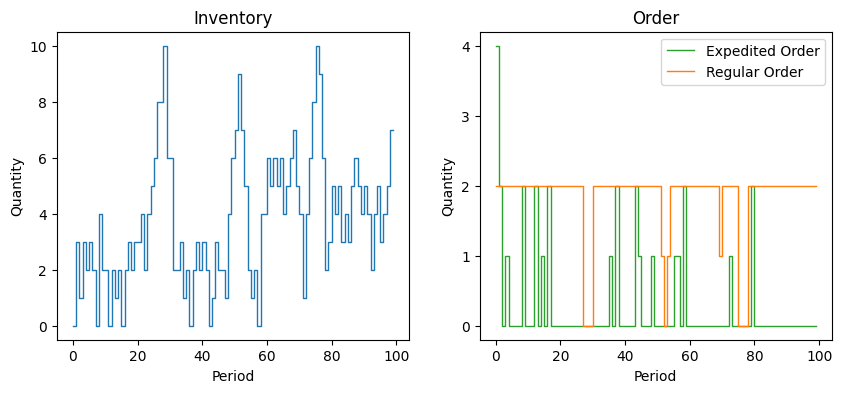

In [16]:
from idinn.sourcing_model import DualSourcingModel
from idinn.dual_controller import CappedDualIndexController
from idinn.demand import UniformDemand

dual_sourcing_model = DualSourcingModel(
    regular_lead_time=2,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    init_inventory=0,
    demand_generator=UniformDemand(low=0, high=4)
)
controller_cdi = CappedDualIndexController()

controller_cdi.fit(
    dual_sourcing_model,
    sourcing_periods=100,
    s_e_range=torch.arange(4, 6),
    s_r_range=torch.arange(8, 10),
    q_r_range=torch.arange(2, 4),
)

controller_cdi.get_average_cost(dual_sourcing_model, sourcing_periods=1000)
# Avg. cost near 25.26
avg_cost = controller_cdi.get_average_cost(dual_sourcing_model, sourcing_periods=1000, seed=42)
print(f"Avg. cost: {avg_cost}")
# Simulate
past_inventories, past_regular_orders, past_expedited_orders = controller_cdi.simulate(dual_sourcing_model, sourcing_periods=100, seed=42)
# Plot
controller_cdi.plot(dual_sourcing_model, sourcing_periods=100, seed=42)
# Predict
controller_cdi.predict(
    current_inventory=3, past_regular_orders=[1], past_expedited_orders=[0]
)

In [6]:
controller_cdi.q_r

tensor(2)

In [5]:
s_e_range=torch.arange(4, 5),
s_r_range=torch.arange(8, 9),
q_r_range=torch.arange(2, 3),

In [7]:
controller_cdi.predict(
    current_inventory=3, past_regular_orders=[1], past_expedited_orders=[0], output_tensor=True
)

(tensor(2), tensor([[1.]]))

In [34]:
controller_cdi.predict(
    current_inventory=3, past_regular_orders=[1], past_expedited_orders=[0]
)

(2, 1)

In [19]:
from idinn.sourcing_model import DualSourcingModel
from idinn.dual_controller import DynamicProgrammingController
from idinn.demand import UniformDemand

dual_sourcing_model = DualSourcingModel(
    regular_lead_time=2,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    init_inventory=0,
    demand_generator=UniformDemand(low=0, high=4)
)
controller_dp = DynamicProgrammingController()
controller_dp.fit(
    dual_sourcing_model,
    max_iterations=101,
    tolerance=1
)

2025-03-05 15:41:56,139 - idinn.dual_controller.dynamic_programming - INFO - Initialized DynamicProgrammingController
2025-03-05 15:41:56,144 - idinn.dual_controller.dynamic_programming - INFO - Starting dynamic programming at 2025-03-05 15:41:56.144855
2025-03-05 15:41:56,145 - idinn.dual_controller.dynamic_programming - INFO - Sourcing model parameters: batch_size=1, lead_time=None, init_inventory=tensor([0.], requires_grad=True), demand_generator=<idinn.demand.UniformDemand object at 0x3115e0bf0>
2025-03-05 15:41:56,145 - idinn.dual_controller.dynamic_programming - INFO - Training parameters: max_iterations=101, tolerance=1
2025-03-05 15:41:56,584 - idinn.dual_controller.dynamic_programming - INFO - Epoch 100/101 - Value: 23.7678
2025-03-05 15:41:56,587 - idinn.dual_controller.dynamic_programming - INFO - Dynamic programmiing completed at 2025-03-05 15:41:56.587634
2025-03-05 15:41:56,587 - idinn.dual_controller.dynamic_programming - INFO - Total training duration: 0:00:00.442779
20

Avg. cost: 23.71500015258789


(3, 1)

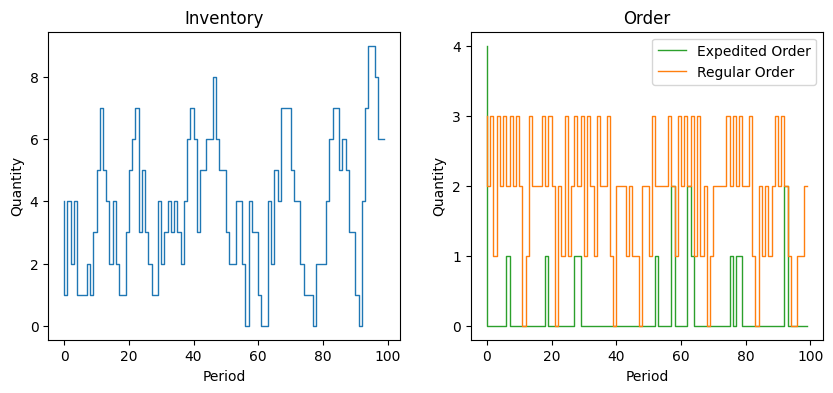

In [39]:
# Avg. cost near 24
avg_cost = controller_dp.get_average_cost(
    dual_sourcing_model, sourcing_periods=1000, seed=42
)
print(f"Avg. cost: {avg_cost}")
# Simulate
past_inventories, past_regular_orders, past_expedited_orders = controller_dp.simulate(dual_sourcing_model, sourcing_periods=100)
# Plot
controller_dp.plot(dual_sourcing_model, sourcing_periods=100)
# Predict
controller_dp.predict(
    current_inventory=3, past_regular_orders=[1], past_expedited_orders=[0]
)

In [20]:
import torch
from idinn.sourcing_model import DualSourcingModel
from idinn.dual_controller import DualSourcingNeuralController
from idinn.demand import UniformDemand
from torch.utils.tensorboard import SummaryWriter

dual_sourcing_model = DualSourcingModel(
    regular_lead_time=2,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    batch_size=256,
    init_inventory=6,
    demand_generator=UniformDemand(low=0, high=4),
)
controller_neural = DualSourcingNeuralController(
    hidden_layers=[128, 64, 32, 16, 8, 4], activation=torch.nn.CELU(alpha=1)
)
controller_neural.fit(
    sourcing_model=dual_sourcing_model,
    sourcing_periods=100,
    validation_sourcing_periods=1000,
    epochs=1,
    tensorboard_writer=SummaryWriter(comment="_dual_4"),
    seed=1234,
)

2025-03-05 15:42:24,509 - idinn.dual_controller.dual_neural - INFO - Initialized DualSourcingNeuralController with hidden_layers=[128, 64, 32, 16, 8, 4], compressed=False
2025-03-05 15:42:24,513 - idinn.dual_controller.dual_neural - INFO - Initialized neural network layers with regular_lead_time=2, expedited_lead_time=0
2025-03-05 15:42:24,513 - idinn.dual_controller.dual_neural - INFO - Starting dual sourcing neural network training at 2025-03-05 15:42:24.513308
2025-03-05 15:42:24,514 - idinn.dual_controller.dual_neural - INFO - Sourcing model parameters: batch_size=256, lead_time=None, init_inventory=tensor([6.], requires_grad=True), demand_generator=<idinn.demand.UniformDemand object at 0x3225af8c0>
2025-03-05 15:42:24,514 - idinn.dual_controller.dual_neural - INFO - Training parameters: epochs=1, sourcing_periods=100, validation_periods=1000, learning_rate=0.003
2025-03-05 15:42:25,410 - idinn.dual_controller.dual_neural - INFO - Epoch 0/1 - Training cost: 47371.7539
2025-03-05 15

In [ ]:
import torch
from idinn.sourcing_model import DualSourcingModel
from idinn.dual_controller import DualSourcingNeuralController
from idinn.demand import UniformDemand
from torch.utils.tensorboard import SummaryWriter

dual_sourcing_model = DualSourcingModel(
    regular_lead_time=2,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    batch_size=256,
    init_inventory=6,
    demand_generator=UniformDemand(low=0, high=4),
)
controller_neural = DualSourcingNeuralController(
    hidden_layers=[128, 64, 32, 16, 8, 4],
    activation=torch.nn.CELU(alpha=1)
)
controller_neural.fit(
    sourcing_model=dual_sourcing_model,
    sourcing_periods=100,
    validation_sourcing_periods=1000,
    epochs=2000,
    tensorboard_writer=SummaryWriter(comment="_dual_4"),
    seed=1234,
)
# Avg. cost near 29.48
avg_cost = controller_neural.get_average_cost(dual_sourcing_model, sourcing_periods=1000)
print(f"Avg. cost: {avg_cost}")
# Simulate
past_inventories, past_regular_orders, past_expedited_orders = controller_neural.simulate(dual_sourcing_model, sourcing_periods=100)
# Plot
controller_neural.plot(dual_sourcing_model, sourcing_periods=100)
# Predict
controller_neural.predict(
    current_inventory=3, past_regular_orders=[1], past_expedited_orders=[0]
)

In [2]:
import torch
from idinn.sourcing_model import DualSourcingModel
from idinn.dual_controller import DualSourcingNeuralController
from idinn.demand import UniformDemand

dual_sourcing_model_train = DualSourcingModel(
    regular_lead_time=2,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    batch_size=8,
    init_inventory=6,
    demand_generator=UniformDemand(low=0, high=4),
)
controller_neural = DualSourcingNeuralController(
    hidden_layers=[128, 64, 32, 16, 8, 4],
    activation=torch.nn.CELU(alpha=1),
)
controller_neural.fit(
    sourcing_model=dual_sourcing_model_train,
    sourcing_periods=100,
    validation_sourcing_periods=1,
    epochs=2,
    seed=1234,
)
past_inventories, past_regular_orders, past_expedited_orders = (
    controller_neural.simulate(
        dual_sourcing_model_train, sourcing_periods=100
    )
)

In [3]:
past_inventories

array([  7.,   3.,  -1.,  -4.,  -4.,  -5.,  -6.,  -6.,  -7., -10., -13.,
       -15., -15., -15., -17., -18., -17., -16., -17., -16., -16., -17.,
       -17., -20., -20., -23., -26., -28., -31., -30., -33., -33., -33.,
       -34., -37., -38., -40., -39., -42., -45., -48., -49., -52., -54.,
       -54., -53., -54., -53., -53., -53., -55., -56., -57., -57., -58.,
       -58., -61., -64., -64., -64., -63., -63., -62., -61., -60., -61.,
       -61., -64., -67., -68., -70., -69., -69., -70., -71., -71., -71.,
       -74., -77., -79., -79., -80., -80., -81., -81., -82., -82., -83.,
       -82., -83., -83., -83., -84., -84., -85., -84., -87., -88., -90.,
       -91., -93.], dtype=float32)

In [ ]:
from idinn.sourcing_model import DualSourcingModel
from idinn.demand import CustomDemand

sourcing_model = DualSourcingModel(
    regular_lead_time=3,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    init_inventory=0,
    demand_generator=CustomDemand({5: 0.999, 6: 0.001})
)